In [126]:
import pandas as pd
import zipfile
import os
from datetime import date, timedelta
import io
import warnings
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
warnings.filterwarnings("ignore")

# --------------------------------------------------------------------------

BASE_PATH = 'C:/Users/Reza/Daneshkar/Project'

START_DATE = date(2024, 2, 1)
END_DATE = date(2024, 3, 31)

MATCH_SUB_CATEGORIES = [
    'away_team', 'away_team_score', 'event', 'home_team',
    'home_team_score', 'round', 'season', 'time', 'tournament', 'venue'
]

OTHER_FOLDERS = [
    'raw_odds_parquet',
    'raw_point_by_point_parquet',
    'raw_statistics_parquet',
    'raw_tennis_power_parquet',
    'raw_votes_parquet'
]
# --------------------------------------------------------------------------

final_categories = [cat.replace('raw_', '').replace('_parquet', '') for cat in OTHER_FOLDERS] + MATCH_SUB_CATEGORIES
data_lists = {cat: [] for cat in final_categories}


def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days) + 1):
        yield start_date + timedelta(n)

print("--- Start Proccessing Reading Data ---")
for single_date in daterange(START_DATE, END_DATE):
    date_str = single_date.strftime("%Y%m%d")
    zip_filename = f"{date_str}.zip"
    zip_filepath = os.path.join(BASE_PATH, zip_filename)

    if not os.path.exists(zip_filepath):
        continue

    print(f"Processing File: {zip_filename}...")
    try:
        with zipfile.ZipFile(zip_filepath, 'r') as zf:
            all_files_in_zip = zf.namelist()

            for sub_cat in MATCH_SUB_CATEGORIES:
                path_pattern = f'raw_match_parquet/{sub_cat}'
                parquet_files = [
                    f for f in all_files_in_zip
                    if path_pattern in f.replace('\\', '/') and f.endswith('.parquet')
                ]
                for parquet_file_path in parquet_files:
                    with zf.open(parquet_file_path) as file_in_zip:
                        df = pd.read_parquet(io.BytesIO(file_in_zip.read()))
                        data_lists[sub_cat].append(df)

            for folder_name in OTHER_FOLDERS:
                path_pattern = f'{folder_name}/'
                clean_name = folder_name.replace('raw_', '').replace('_parquet', '')
                parquet_files = [
                    f for f in all_files_in_zip
                    if path_pattern in f.replace('\\', '/') and f.endswith('.parquet')
                ]
                for parquet_file_path in parquet_files:
                    with zf.open(parquet_file_path) as file_in_zip:
                        df = pd.read_parquet(io.BytesIO(file_in_zip.read()))
                        data_lists[clean_name].append(df)

    except Exception as e:
        print(f"  Processing Error {zip_filename}: {e}")

print("\n--- Processing Done, Lets aggregate Data... ---")

final_dataframes = {}
for name, df_list in data_lists.items():
    if df_list:
        final_dataframes[name] = pd.concat(df_list, ignore_index=True)
        print(f" Category: '{name}' aggregated. Number of Records: {len(final_dataframes[name])}")
    else:
        print(f" No Data Finded For '{name}' !!!")

if final_dataframes:
    print("\n--- Final Results ---")
    for name, df in final_dataframes.items():
        print(f"\n================================")
        print(f" Final DF: '{name}'")
        print(f"================================")
        print(f"Row's and Column's (Shape): {df.shape}")
        print(df.head())

--- Start Proccessing Reading Data ---
Processing File: 20240201.zip...
Processing File: 20240202.zip...
Processing File: 20240203.zip...
Processing File: 20240204.zip...
Processing File: 20240205.zip...
Processing File: 20240206.zip...
Processing File: 20240207.zip...
Processing File: 20240208.zip...
Processing File: 20240209.zip...
Processing File: 20240210.zip...
Processing File: 20240211.zip...
Processing File: 20240212.zip...
Processing File: 20240213.zip...
Processing File: 20240214.zip...
Processing File: 20240215.zip...
Processing File: 20240216.zip...
Processing File: 20240217.zip...
Processing File: 20240218.zip...
Processing File: 20240219.zip...
Processing File: 20240220.zip...
Processing File: 20240221.zip...
Processing File: 20240222.zip...
Processing File: 20240223.zip...
Processing File: 20240224.zip...
Processing File: 20240225.zip...
Processing File: 20240226.zip...
Processing File: 20240227.zip...
Processing File: 20240228.zip...
Processing File: 20240229.zip...
Proc

In [127]:
final_dataframes.keys()

dict_keys(['odds', 'point_by_point', 'statistics', 'tennis_power', 'votes', 'away_team', 'away_team_score', 'event', 'home_team', 'home_team_score', 'round', 'season', 'time', 'tournament', 'venue'])

In [128]:
for key,val in final_dataframes.items():
    print(key)
    print(val.columns)

odds
Index(['match_id', 'market_id', 'market_name', 'is_live', 'suspended',
       'initial_fractional_value', 'fractional_value', 'choice_name',
       'choice_source_id', 'winnig', 'change'],
      dtype='object')
point_by_point
Index(['match_id', 'set_id', 'game_id', 'point_id', 'home_point', 'away_point',
       'point_description', 'home_point_type', 'away_point_type', 'home_score',
       'away_score', 'serving', 'scoring'],
      dtype='object')
statistics
Index(['match_id', 'period', 'statistic_category_name', 'statistic_name',
       'home_stat', 'away_stat', 'compare_code', 'statistic_type',
       'value_type', 'home_value', 'away_value', 'home_total', 'away_total'],
      dtype='object')
tennis_power
Index(['match_id', 'set_num', 'game_num', 'value', 'break_occurred'], dtype='object')
votes
Index(['match_id', 'home_vote', 'away_vote'], dtype='object')
away_team
Index(['match_id', 'name', 'slug', 'gender', 'user_count', 'residence',
       'birthplace', 'height', 'weight', '

In [35]:
# Statistics == Period 
# Point By Point == Game Info 

# Q1

In [221]:
home_players = final_dataframes['home_team']['player_id']
away_players = final_dataframes['away_team']['player_id']

all_player_ids = pd.concat([home_players, away_players])

unique_players_count = all_player_ids.nunique()

print("Q1 Answer: ")
print(f"How many tennis players are included in the dataset?")
print(f"Unique Players in dataset are : {unique_players_count}")


Q1 Answer: 
How many tennis players are included in the dataset?
Unique Players in dataset are : 2644


# Q2

In [222]:
home_players_info = final_dataframes['home_team'][['player_id', 'height']]
away_players_info = final_dataframes['away_team'][['player_id', 'height']]

all_players_info = pd.concat([home_players_info, away_players_info])

unique_players_info = all_players_info.drop_duplicates(subset=['player_id'])

average_height = unique_players_info['height'].mean()

print("Q2 Answer:")
print(f"What is the average height of the players?")
print(f"Average height of Players: {average_height:.2f}m")


Q2 Answer:
What is the average height of the players?
Average height of Players: 1.82m


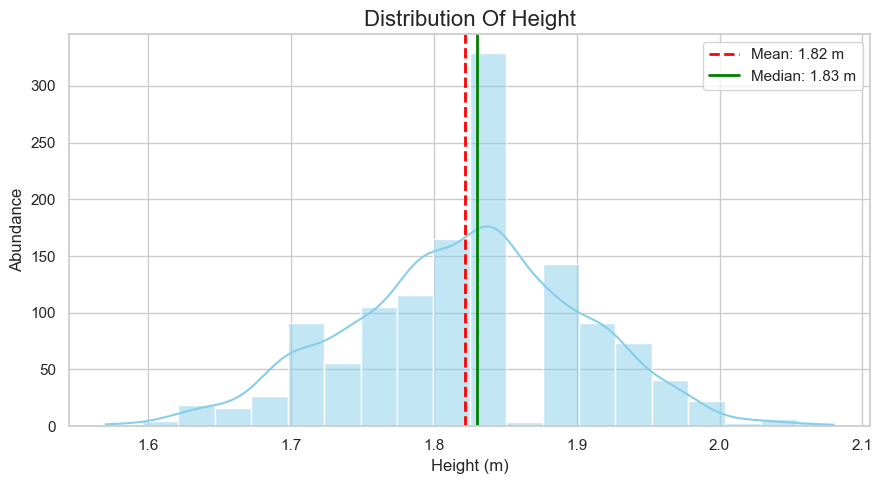

In [223]:
height_data = unique_players_info['height'].dropna()

mean_height = height_data.mean()
median_height = height_data.median()

sns.set_style("whitegrid")
plt.figure(figsize=(9, 5))
sns.histplot(height_data, kde=True, color='skyblue', bins=20)

plt.axvline(mean_height, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_height:.2f} m')
plt.axvline(median_height, color='green', linestyle='-', linewidth=2, label=f'Median: {median_height:.2f} m')

plt.title('Distribution Of Height', fontsize=16)
plt.xlabel('Height (m)', fontsize=12)
plt.ylabel('Abundance', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

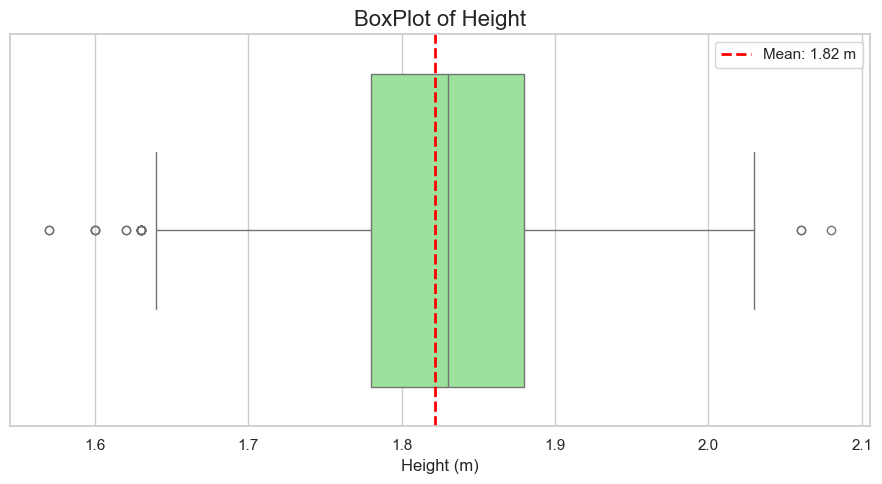

In [224]:
plt.figure(figsize=(9, 5))
sns.boxplot(x=height_data, color='lightgreen')

plt.axvline(mean_height, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_height:.2f} m')

plt.title('BoxPlot of Height', fontsize=16)
plt.xlabel('Height (m)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Q3

In [225]:
home_players = final_dataframes['home_team'][['match_id', 'player_id', 'name']]
away_players = final_dataframes['away_team'][['match_id', 'player_id', 'name']]
events = final_dataframes['event'][['match_id', 'winner_code']]


home_wins = events[events['winner_code'] == 1]
home_winners = pd.merge(home_wins, home_players, on='match_id')

away_wins = events[events['winner_code'] == 2]
away_winners = pd.merge(away_wins, away_players, on='match_id')

all_winners = pd.concat([home_winners, away_winners])
win_counts = all_winners['name'].value_counts()

top_winner_name = win_counts.index[0]
top_winner_wins = win_counts.iloc[0]

print("Q3 Answer: ")
print(f"Which player has the highest number of wins?")
print(f"{top_winner_name} With {top_winner_wins} Total Wins")


Q3 Answer: 
Which player has the highest number of wins?
Chidekh C. With 131 Total Wins


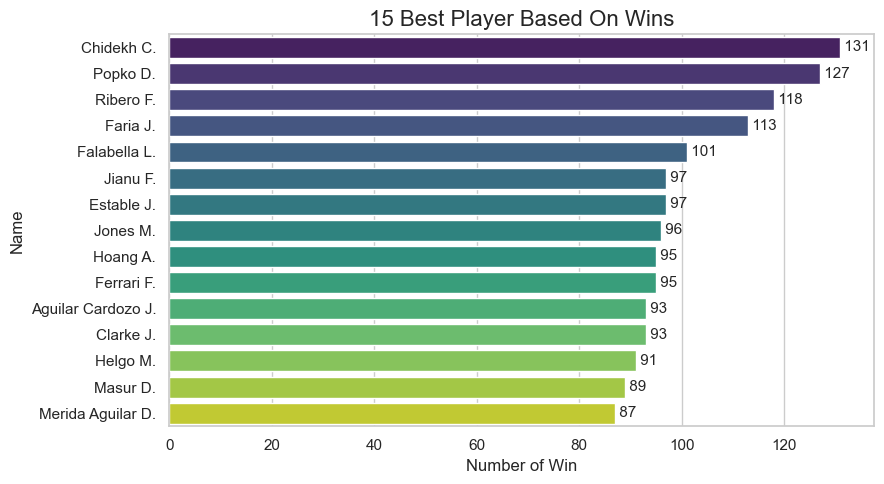

In [226]:
top_15_players = win_counts.head(15)

plt.figure(figsize=(9, 5))

sns.barplot(x=top_15_players.values, y=top_15_players.index, palette="viridis", orient='h')

plt.title('15 Best Player Based On Wins', fontsize=16)
plt.xlabel('Number of Win', fontsize=12)
plt.ylabel('Name', fontsize=12)

for index, value in enumerate(top_15_players.values):
    plt.text(value, index, f' {value}', va='center', fontsize=11)
plt.tight_layout()
plt.show()

# Q4

In [227]:
time_df = final_dataframes['time'].copy()

period_cols = ['period_1', 'period_2', 'period_3', 'period_4', 'period_5']

time_df[period_cols] = time_df[period_cols].fillna(0)

time_df['total_duration_seconds'] = time_df[period_cols].sum(axis=1)

longest_match_row = time_df.loc[time_df['total_duration_seconds'].idxmax()]
longest_match_id = longest_match_row['match_id']
longest_duration_seconds = longest_match_row['total_duration_seconds']

hours = int(longest_duration_seconds // 3600)
minutes = int((longest_duration_seconds % 3600) // 60)
seconds = int(longest_duration_seconds % 60)
duration_formatted = f"{hours} hour, {minutes} minutes {seconds} seconds"

home_player_name = final_dataframes['home_team'][final_dataframes['home_team']['match_id'] == longest_match_id]['name'].iloc[0]
away_player_name = final_dataframes['away_team'][final_dataframes['away_team']['match_id'] == longest_match_id]['name'].iloc[0]
tournament_name = final_dataframes['tournament'][final_dataframes['tournament']['match_id'] == longest_match_id]['tournament_name'].iloc[0]

print("Q4 Answer:")
print(f"What is the longest match recorded in terms of duration?")
print(f"Longest Match Recorded:")
print(f" Total Time: {duration_formatted}")
print(f" Tournamnet: {tournament_name}")
print(f"Players: {home_player_name} VS {away_player_name}")


Q4 Answer:
What is the longest match recorded in terms of duration?
Longest Match Recorded:
 Total Time: 93 hour, 33 minutes 10 seconds
 Tournamnet: Antalya, Singles Qualifying, W-ITF-TUR-06A
Players: Shapatava S. VS Branstine C.


# Q5

In [229]:
home_scores = final_dataframes['home_team_score']
away_scores = final_dataframes['away_team_score']

all_scores = pd.merge(home_scores, away_scores, on='match_id', suffixes=('_home', '_away'))

all_scores['sets_played'] = 0

for i in range(1, 6):
    home_col = f'period_{i}_home'
    away_col = f'period_{i}_away'

    if home_col in all_scores.columns and away_col in all_scores.columns:
        home_s = pd.to_numeric(all_scores[home_col], errors='coerce').fillna(0)
        away_s = pd.to_numeric(all_scores[away_col], errors='coerce').fillna(0)

        all_scores['sets_played'] += ((home_s + away_s) > 0).astype(int)

sets_played_distribution = all_scores[all_scores['sets_played'] > 0]['sets_played'].value_counts()

most_common_sets_played = sets_played_distribution.index[0]

print("Q5 Answer")
print("How many sets are typically played in a tennis match?")
print(f"Tennis Matches Typically ends in {most_common_sets_played} Sets")

Q5 Answer
How many sets are typically played in a tennis match?
Tennis Matches Typically ends in 2 Sets


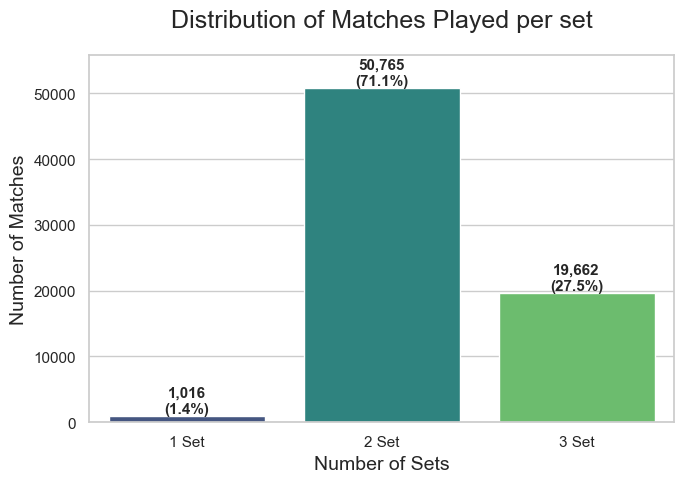

In [230]:
sets_played_distribution = sets_played_distribution.sort_index()

total_matches = sets_played_distribution.sum()
percentages = (sets_played_distribution / total_matches * 100).round(1)

plt.figure(figsize=(7, 5))
sns.set_style("whitegrid")

barplot = sns.barplot(x=sets_played_distribution.index, y=sets_played_distribution.values,
                      palette="viridis")

plt.title('Distribution of Matches Played per set', fontsize=18, pad=20)
plt.ylabel('Number of Matches', fontsize=14)
plt.xlabel('Number of Sets', fontsize=14)

plt.xticks(ticks=range(len(sets_played_distribution)),
           labels=[f'{i} Set' for i in sets_played_distribution.index])


for index, (set_count, match_count) in enumerate(sets_played_distribution.items()):
    percentage = percentages.loc[set_count]
    plt.text(index, match_count, f'{match_count:,}\n({percentage}%)',
             ha='center', va='bottom', fontsize=11, weight='bold')


plt.ylim(0, sets_played_distribution.max() * 1.1)

plt.tight_layout()
plt.show()

# Q6

In [231]:
home_info = final_dataframes['home_team'][['player_id', 'country']]
away_info = final_dataframes['away_team'][['player_id', 'country']]
all_player_info = pd.concat([home_info, away_info])
player_countries = all_player_info.drop_duplicates(subset=['player_id'])

wins_with_country = pd.merge(all_winners, player_countries, on='player_id')

country_win_counts = wins_with_country['country'].value_counts()

top_country_name = country_win_counts.index[0]
top_country_wins = country_win_counts.iloc[0]

print("Q6 Answer:")
print("Which country has produced the most successful tennis players?")
print(f"Most Successful Country: {top_country_name} With {top_country_wins} Total Wins")

Q6 Answer:
Which country has produced the most successful tennis players?
Most Successful Country: France With 4889 Total Wins


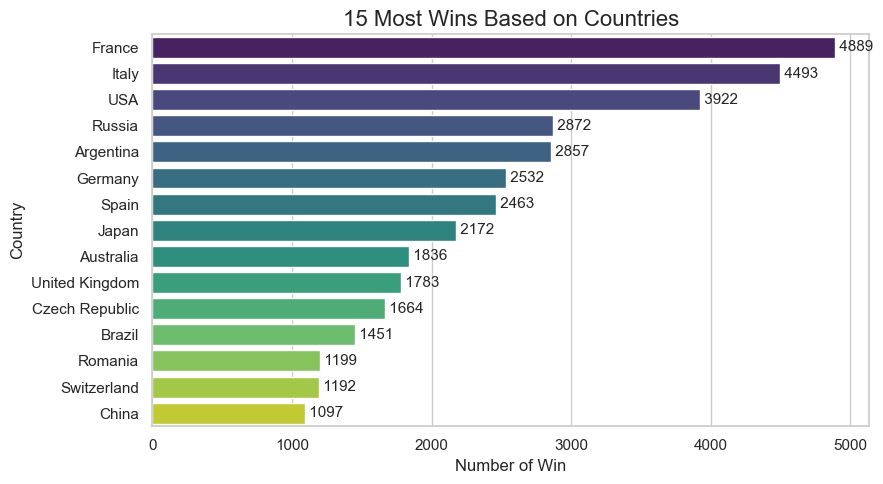

In [232]:
top_15_players = country_win_counts.head(15)

plt.figure(figsize=(9, 5))

sns.barplot(x=top_15_players.values, y=top_15_players.index, palette="viridis", orient='h')

plt.title('15 Most Wins Based on Countries', fontsize=16)
plt.xlabel('Number of Win', fontsize=12)
plt.ylabel('Country', fontsize=12)

for index, value in enumerate(top_15_players.values):
    plt.text(value, index, f' {value}', va='center', fontsize=11)
plt.tight_layout()
plt.show()

# Q7

In [233]:
stats_df = final_dataframes['statistics']
aces_stats = stats_df[stats_df['statistic_name'] == 'aces'].copy()


aces_stats['home_value'] = pd.to_numeric(aces_stats['home_value'], errors='coerce')
aces_stats['away_value'] = pd.to_numeric(aces_stats['away_value'], errors='coerce')

aces_stats.fillna({'home_value': 0, 'away_value': 0}, inplace=True)

total_aces_per_match = aces_stats.groupby('match_id')[['home_value', 'away_value']].sum()

total_aces_per_match['total_aces'] = total_aces_per_match['home_value'] + total_aces_per_match['away_value']

average_aces_per_match = total_aces_per_match['total_aces'].mean()

print("Q7 Answer: ")
print(f"What is the average number of aces per match?")
print(f"Mean Aces per Match: {average_aces_per_match:.2f}")

Q7 Answer: 
What is the average number of aces per match?
Mean Aces per Match: 21.66


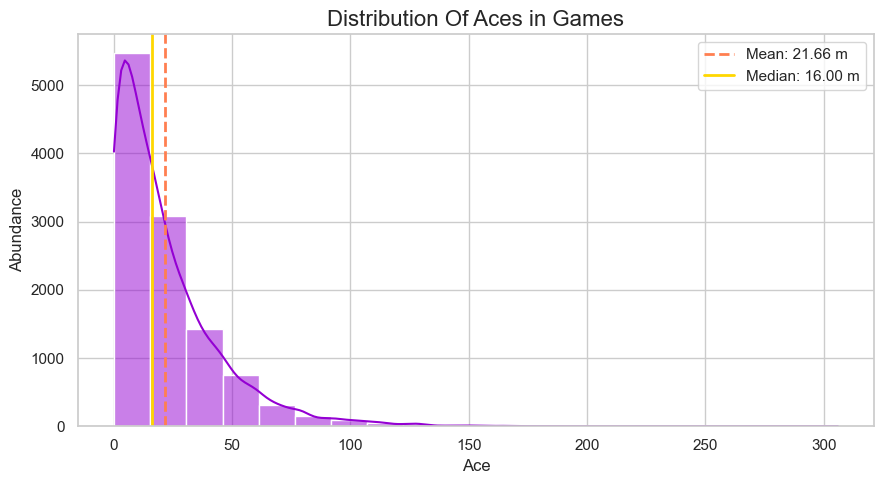

In [234]:
aces_data = total_aces_per_match['total_aces'].dropna()

mean_ace = aces_data.mean()
median_ace = aces_data.median()

sns.set_style("whitegrid")
plt.figure(figsize=(9, 5))
sns.histplot(aces_data, kde=True, color='darkviolet', bins=20)

plt.axvline(mean_ace, color='coral', linestyle='--', linewidth=2, label=f'Mean: {mean_ace:.2f} m')
plt.axvline(median_ace, color='gold', linestyle='-', linewidth=2, label=f'Median: {median_ace:.2f} m')

plt.title('Distribution Of Aces in Games', fontsize=16)
plt.xlabel('Ace', fontsize=12)
plt.ylabel('Abundance', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Q8

In [142]:
stats_df = final_dataframes['statistics']
df_stats = stats_df[stats_df['statistic_name'] == 'double_faults'].copy()

df_stats['home_value'] = pd.to_numeric(df_stats['home_value'], errors='coerce')
df_stats['away_value'] = pd.to_numeric(df_stats['away_value'], errors='coerce')
df_stats.fillna(0, inplace=True)

total_df_per_match = df_stats.groupby('match_id')[['home_value', 'away_value']].sum()
total_df_per_match['total_double_faults'] = total_df_per_match['home_value'] + total_df_per_match['away_value']

match_gender = final_dataframes['home_team'][['match_id', 'gender']]

df_with_gender = pd.merge(total_df_per_match, match_gender, on='match_id')

avg_df_by_gender = df_with_gender.groupby('gender')['total_double_faults'].mean()


print("Q8 Answer:")
print("Is there a difference in the number of double faults based on gender?")
print("Mean double faults based on gender:")
print(avg_df_by_gender)

Q8 Answer:
Is there a difference in the number of double faults based on gender?
Mean double faults based on gender:
gender
F    28.750522
M    22.241623
Name: total_double_faults, dtype: float64


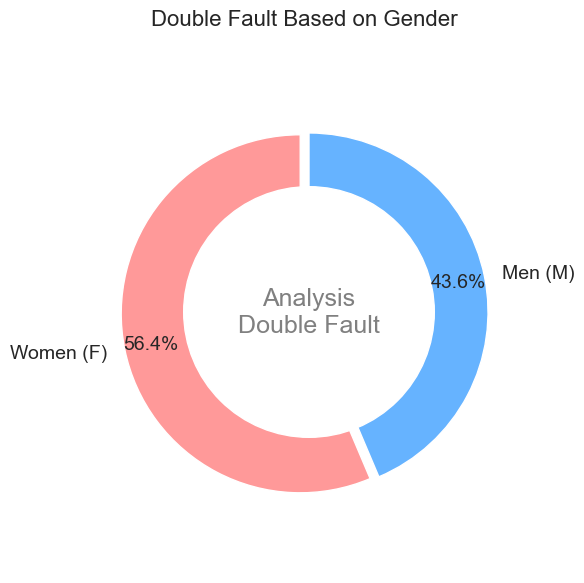

In [143]:
labels = ['Women (F)', 'Men (M)']
sizes = avg_df_by_gender.values
colors = ['#ff9999','#66b3ff']
explode = (0.05, 0) 

plt.figure(figsize=(6, 6))

wedges, texts, autotexts = plt.pie(sizes,
                                   colors=colors,
                                   labels=labels,
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   pctdistance=0.85,
                                   explode=explode,
                                   textprops={'fontsize': 14})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.title('Double Fault Based on Gender', fontsize=16, pad=20)

plt.text(0, 0, 'Analysis\nDouble Fault', ha='center', va='center', fontsize=18, color='gray')
plt.tight_layout()
plt.show()

### Yes There is a Significance Difference Between two Genders

# Q9

In [144]:
rounds_df = final_dataframes['round']
finals_df = rounds_df[rounds_df['name'] == 'Final']

events_df = final_dataframes['event'][['match_id', 'winner_code', 'start_datetime']]
final_events_df = pd.merge(finals_df, events_df, on='match_id')

home_winners_df = pd.merge(final_events_df[final_events_df['winner_code'] == 1], final_dataframes['home_team'][['match_id', 'name']], on='match_id')
away_winners_df = pd.merge(final_events_df[final_events_df['winner_code'] == 2], final_dataframes['away_team'][['match_id', 'name']], on='match_id')
tournament_winners_df = pd.concat([home_winners_df, away_winners_df])

tournament_winners_df['start_datetime'] = pd.to_datetime(tournament_winners_df['start_datetime'], unit='s')
tournament_winners_df['month'] = tournament_winners_df['start_datetime'].dt.month_name() # استخراج نام ماه

monthly_wins = tournament_winners_df.groupby(['month', 'name_y']).size().reset_index(name='tournament_wins')

max_wins_row = monthly_wins.loc[monthly_wins['tournament_wins'].idxmax()]
top_player = max_wins_row['name_y']
top_month = max_wins_row['month']
top_wins = max_wins_row['tournament_wins']
result_string = f"Player {top_player} With {top_wins} Total Wins in Month of {top_month}"

print("Q9 Answer: ")
print("Which player has won the most tournaments in a single month?")
print(result_string)

Q9 Answer: 
Which player has won the most tournaments in a single month?
Player Chidekh C. With 35 Total Wins in Month of February


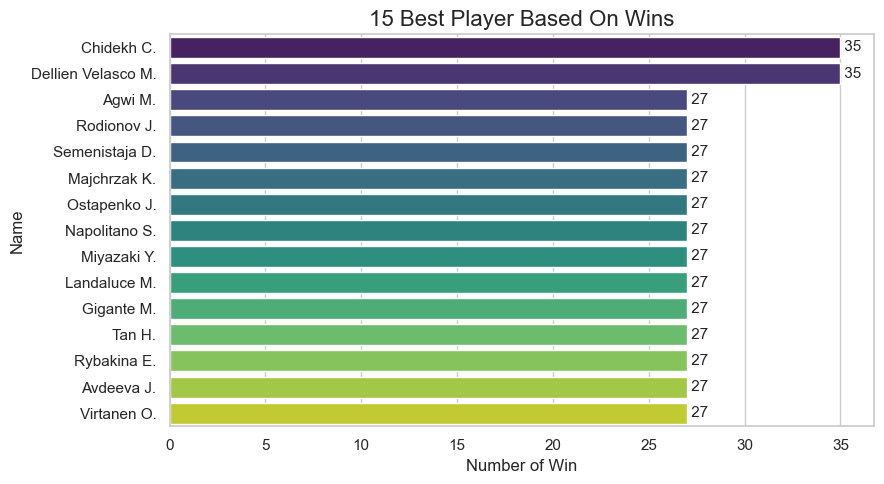

In [145]:
top_15_players = monthly_wins.sort_values(by=['tournament_wins'], ascending=False).head(15)

plt.figure(figsize=(9, 5))

sns.barplot(x=top_15_players['tournament_wins'], y=top_15_players['name_y'], palette="viridis", orient='h')

plt.title('15 Best Player Based On Wins', fontsize=16)
plt.xlabel('Number of Win', fontsize=12)
plt.ylabel('Name', fontsize=12)

for index, value in enumerate(top_15_players['tournament_wins']):
    plt.text(value, index, f' {value}', va='center', fontsize=11)
plt.tight_layout()
plt.show()

# Q10

In [146]:
home_info = final_dataframes['home_team'][['player_id', 'height', 'current_rank']]
away_info = final_dataframes['away_team'][['player_id', 'height', 'current_rank']]
all_players_info = pd.concat([home_info, away_info])

unique_players_df = all_players_info.drop_duplicates(subset=['player_id']).copy()

unique_players_df['current_rank'] = pd.to_numeric(unique_players_df['current_rank'], errors='coerce')

cleaned_df = unique_players_df.dropna(subset=['height', 'current_rank'])

correlation = cleaned_df['height'].corr(cleaned_df['current_rank'])

print("Q10 Answer: ")
print("Is there a correlation between a player's height and their ranking?")
print(f"Correlation Coefficent between height and ranking : {correlation:.4f}")

Q10 Answer: 
Is there a correlation between a player's height and their ranking?
Correlation Coefficent between height and ranking : 0.1051


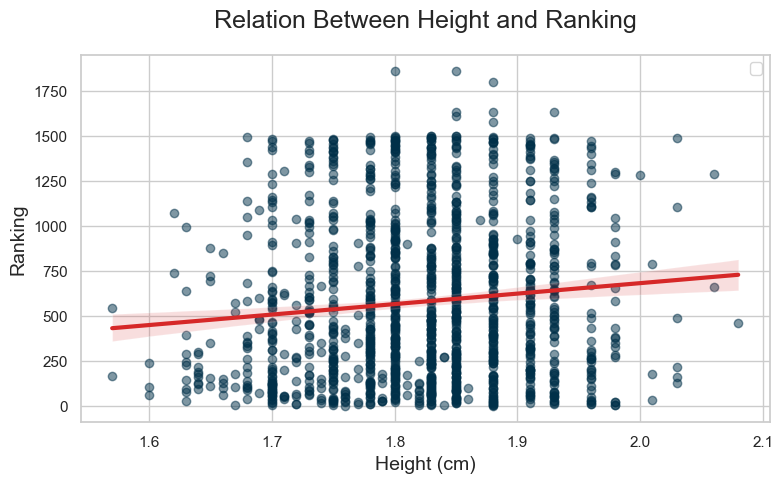

In [190]:
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")

regplot = sns.regplot(
    x='height',
    y='current_rank',
    data=cleaned_df,
    scatter_kws={'alpha': 0.5, 'color': '#003049'}, 
    line_kws={'color': '#d62828', 'linewidth': 3}
)

#plt.gca().invert_yaxis()


plt.title('Relation Between Height and Ranking', fontsize=18, pad=20)
plt.xlabel('Height (cm)', fontsize=14)
plt.ylabel('Ranking', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

### Based On this Correlation There is a slightly positive Correlation between Height and Rankings of a Player

# Q11

In [147]:
time_df = final_dataframes['time'].copy()
period_cols = ['period_1', 'period_2', 'period_3', 'period_4', 'period_5']

time_df[period_cols] = time_df[period_cols].fillna(0)

time_df['total_duration_seconds'] = time_df[period_cols].sum(axis=1)

average_duration_seconds = time_df[time_df['total_duration_seconds'] > 0]['total_duration_seconds'].mean()

hours = int(average_duration_seconds // 3600)
minutes = int((average_duration_seconds % 3600) // 60)
seconds = int(average_duration_seconds % 60)
avg_duration_formatted = f"{hours} hour, {minutes} minutes {seconds} Second"

print("Q11 Answer")
print(f"What is the average duration of matches?")
print(f"Average Duration of Matches: {avg_duration_formatted}")


Q11 Answer
What is the average duration of matches?
Average Duration of Matches: 1 hour, 59 minutes 8 Second


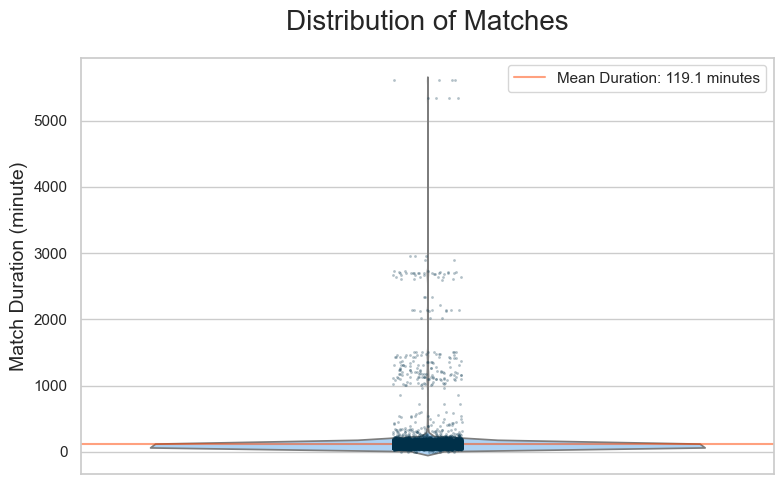

In [148]:
duration_data = time_df[time_df['total_duration_seconds'] > 0]['total_duration_seconds']

duration_in_minutes = duration_data / 60

mean_duration = duration_in_minutes.mean()
median_duration = duration_in_minutes.median()
mode_duration = duration_in_minutes.mode()[0]


plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")

ax = sns.violinplot(y=duration_in_minutes, color="#a2d2ff", inner=None)

sns.stripplot(y=duration_in_minutes, color="#003049", jitter=0.05, size=2, alpha=0.3)

plt.axhline(y = mean_duration, color='orangered', alpha= 0.5, label=f"Mean Duration: {mean_duration:.1f} minutes")

ax.set_title('Distribution of Matches', fontsize=20, pad=20)
ax.set_ylabel('Match Duration (minute)', fontsize=14)

plt.legend()
plt.tight_layout()
plt.show()

# Q12

In [165]:
home_scores = final_dataframes['home_team_score']
away_scores = final_dataframes['away_team_score']
match_gender = final_dataframes['home_team'][['match_id', 'gender']]

all_scores = pd.merge(home_scores, away_scores, on='match_id', suffixes=('_home', '_away'))
scores_with_gender = pd.merge(all_scores, match_gender, on='match_id')

for i in range(1, 6):
    home_col = f'period_{i}_home'
    away_col = f'period_{i}_away'
    games_col = f'games_in_set_{i}'

    if home_col in scores_with_gender.columns and away_col in scores_with_gender.columns:
        home_s = pd.to_numeric(scores_with_gender[home_col], errors='coerce').fillna(0)
        away_s = pd.to_numeric(scores_with_gender[away_col], errors='coerce').fillna(0)
        scores_with_gender[games_col] = home_s + away_s
    else:
        scores_with_gender[games_col] = 0

games_cols = [f'games_in_set_{i}' for i in range(1, 6)]
long_format_games = pd.melt(
    scores_with_gender,
    id_vars=['match_id', 'gender'],
    value_vars=games_cols,
    var_name='set',
    value_name='games_played'
)

played_sets = long_format_games[long_format_games['games_played'] > 0]

avg_games_per_set = played_sets.groupby('gender')['games_played'].mean()

print("Q12 Asnswer")
print("What is the average number of games per set in men's matches compared to women's matches?")
print("Average of Number of games per set in men's and women's matchse:")
print(avg_games_per_set)

Q12 Asnswer
What is the average number of games per set in men's matches compared to women's matches?
Average of Number of games per set in men's and women's matchse:
gender
F    8.992062
M    9.303368
Name: games_played, dtype: float64


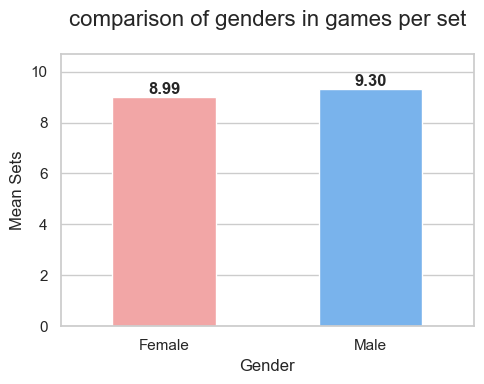

In [196]:
plt.figure(figsize=(5, 4))
sns.set_style("whitegrid")

colors = {'F': '#ff9999', 'M': '#66b3ff'}
palette = [colors[gender] for gender in avg_games_per_set.index]

barplot = sns.barplot(x=avg_games_per_set.index, y=avg_games_per_set.values, palette=palette, width=0.5)

plt.title('comparison of genders in games per set', fontsize=16, pad=20)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Mean Sets', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

for index, value in enumerate(avg_games_per_set.values):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12, weight='bold')

plt.ylim(0, avg_games_per_set.max() * 1.15)

plt.tight_layout()
plt.show()

# Q13

In [150]:
home_info = final_dataframes['home_team'][['player_id', 'plays']]
away_info = final_dataframes['away_team'][['player_id', 'plays']]
all_players_info = pd.concat([home_info, away_info])
unique_players_df = all_players_info.drop_duplicates(subset=['player_id'])

hand_distribution = unique_players_df['plays'].value_counts()
hand_percentage = (unique_players_df['plays'].value_counts(normalize=True) * 100).round(2)

print("Q13 Answer")
print("What is the distribution of left-handed versus right-handed players?")
print("--- Number of Players ---")
print(hand_distribution)
print("--- Percentage Distribution ---")
print(hand_percentage.astype(str) + '%')

Q13 Answer
What is the distribution of left-handed versus right-handed players?
--- Number of Players ---
plays
right-handed    1013
left-handed      133
Name: count, dtype: int64
--- Percentage Distribution ---
plays
right-handed    88.39%
left-handed     11.61%
Name: proportion, dtype: object


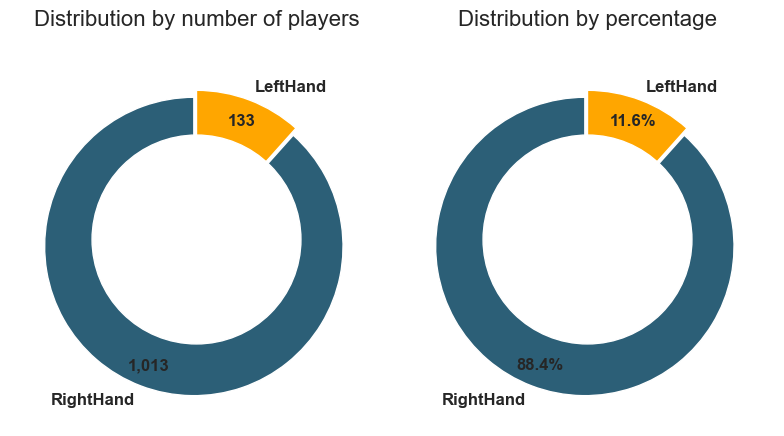

In [206]:
hand_percentage_values = hand_percentage.astype(float)

labels = ['RightHand', 'LeftHand']
colors = ['#2c5f77', '#ffa600']
explode = (0.05, 0) 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))

ax1.pie(hand_distribution,
        labels=labels,
        colors=colors,
        autopct=lambda p: f'{p * hand_distribution.sum() / 100:,.0f}',
        startangle=90,
        pctdistance=0.85,
        explode=explode,
        textprops={'fontsize': 12, 'weight': 'bold'})

centre_circle1 = plt.Circle((0,0),0.70,fc='white')
ax1.add_artist(centre_circle1)
ax1.set_title('Distribution by number of players', fontsize=16, pad=20)


ax2.pie(hand_percentage_values,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%', 
        startangle=90,
        pctdistance=0.85,
        explode=explode,
        textprops={'fontsize': 12, 'weight': 'bold'})

centre_circle2 = plt.Circle((0,0),0.70,fc='white')
ax2.add_artist(centre_circle2)
ax2.set_title('Distribution by percentage', fontsize=16, pad=20)

plt.tight_layout()
plt.show()

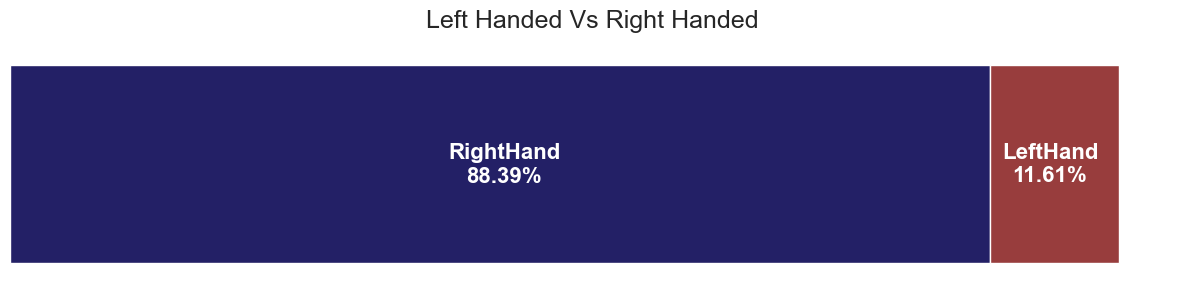

In [151]:
colors = ['#232066', '#983D3D']

fig, ax = plt.subplots(1, 1, figsize=(12, 3))

ax.barh(0, hand_percentage.values[0], color=colors[0])
ax.barh(0, hand_percentage.values[1], left=hand_percentage.values[0], color=colors[1])

ax.text(df_dist['proportion'][0] / 2, 0,
        f"RightHand\n{hand_percentage.values[0]}%",
        ha='center', va='center', color='white', fontsize=16, weight='bold')
ax.text(hand_percentage.values[0] + (df_dist['proportion'][1] / 2), 0,
        f"LeftHand\n{hand_percentage.values[1]}%",
        ha='center', va='center', color='white', fontsize=16, weight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Left Handed Vs Right Handed', fontsize=18, pad=20)
plt.tight_layout()
plt.show()

# Q14

In [212]:
tournament_df = final_dataframes['tournament']

unique_tournaments = tournament_df.drop_duplicates(subset=['tournament_id'])

surface_distribution = unique_tournaments['ground_type'].value_counts()
most_common_surface = surface_distribution.index[0]

print("Q14 Answer")
print("What is the most common type of surface used in tournaments?")
print(f"Most Common Type of Surface is '{most_common_surface}'")

Q14 Answer
What is the most common type of surface used in tournaments?
Most Common Type of Surface is 'Hardcourt outdoor'


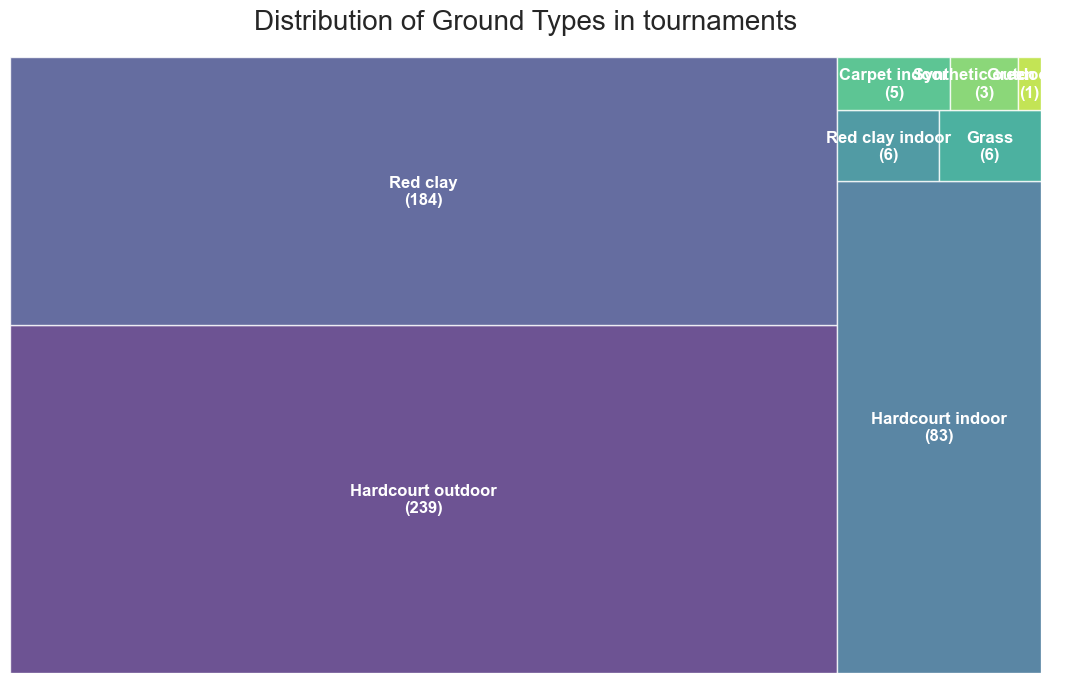

In [219]:
import squarify

plt.figure(figsize=(11, 7))
sns.set_style(style="whitegrid")

labels = [f'{name}\n({count})' for name, count in surface_distribution.items()]

colors = sns.color_palette("viridis", len(surface_distribution))

squarify.plot(sizes=surface_distribution.values,
              label=labels,
              color=colors,
              alpha=0.8,
              text_kwargs={'fontsize': 12, 'color': 'white', 'weight':'bold'}) 

plt.title('Distribution of Ground Types in tournaments', fontsize=20, pad=20)

plt.axis('off')

plt.tight_layout()
plt.show()

# Q15

In [152]:
home_countries = final_dataframes['home_team']['country']
away_countries = final_dataframes['away_team']['country']

all_countries = pd.concat([home_countries, away_countries])
distinct_country_count = all_countries.nunique()

print("Q15 Answer")
print("How many distinct countries are represented in the dataset?")
print(f"Unique Countries in Dataset: {distinct_country_count}")

Q15 Answer
How many distinct countries are represented in the dataset?
Unique Countries in Dataset: 101


# Q16

In [153]:
home_players = final_dataframes['home_team'][['match_id', 'player_id', 'name', 'current_rank']]
away_players = final_dataframes['away_team'][['match_id', 'player_id', 'name', 'current_rank']]
events = final_dataframes['event'][['match_id', 'winner_code']]

home_view = pd.merge(home_players, away_players, on='match_id', suffixes=('_player', '_opponent'))
home_view = pd.merge(home_view, events, on='match_id')
home_view['win'] = (home_view['winner_code'] == 1).astype(int)

away_view = pd.merge(away_players, home_players, on='match_id', suffixes=('_player', '_opponent'))
away_view = pd.merge(away_view, events, on='match_id')
away_view['win'] = (away_view['winner_code'] == 2).astype(int)

all_matches_detailed = pd.concat([home_view, away_view])
all_matches_detailed.rename(columns={'name_player': 'player_name', 'current_rank_opponent': 'opponent_rank'}, inplace=True)

all_matches_detailed['opponent_rank'] = pd.to_numeric(all_matches_detailed['opponent_rank'], errors='coerce')
top_10_matches = all_matches_detailed[all_matches_detailed['opponent_rank'] <= 10].copy()

win_summary = top_10_matches.groupby('player_name').agg(
    wins=('win', 'sum'),
    total_matches=('win', 'size')
).reset_index()

min_matches_threshold = 2
meaningful_summary = win_summary[win_summary['total_matches'] >= min_matches_threshold].copy()

meaningful_summary['win_percentage'] = (meaningful_summary['wins'] / meaningful_summary['total_matches']) * 100
meaningful_summary = meaningful_summary.sort_values(by='win_percentage', ascending=False)
top_performer = meaningful_summary.iloc[0]
result_string = f" Heighest Winning Percentage Againsts Top 10 Ranked: {top_performer['player_name']} With {top_performer['win_percentage']:.2f}% Winning Percentage ({top_performer['wins']} Wins from {top_performer['total_matches']} Match)"

print("Q16 Answer")
print("Which player has the highest winning percentage against top 10 ranked opponents?")
print(result_string)

Q16 Answer
Which player has the highest winning percentage against top 10 ranked opponents?
 Heighest Winning Percentage Againsts Top 10 Ranked: Świątek I. With 100.00% Winning Percentage (24 Wins from 24 Match)


# Q17

In [154]:
power_df = final_dataframes['tennis_power']

breaks_per_match = power_df[power_df['break_occurred'] == True].groupby('match_id').size()

total_breaks = breaks_per_match.sum()
total_matches = final_dataframes['event']['match_id'].nunique()

average_breaks = total_breaks / total_matches
result_string = f"Avarega Number of Breaks of Serve per Match: {average_breaks:.2f}"

print("Q17 Answer:")
print("What is the average number of breaks of serve per match?")
print(result_string)

Q17 Answer:
What is the average number of breaks of serve per match?
Avarega Number of Breaks of Serve per Match: 9.35
